In [1]:
#14장. 생성 모델
#CNN, 오토인코더

#새로운 샘플 생성 → GAN → 랜덤으로 출력
#생성 모델 → 노이즈(예측값)

#확률적
#분류 모델 vs 생성 모델

#조건부 확률: p(y | x)

#함수형 API

In [2]:
#p.528
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,))			# (1)
dense = layers.Dense(64, activation="relu")		# (2)
x = dense(inputs)					# (3)
x = layers.Dense(64, activation="relu")(x)		# (4)
outputs = layers.Dense(10)(x)				# (5)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3444 - accuracy: 0.9025 - val_loss: 0.1869 - val_accuracy: 0.9458
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1611 - accuracy: 0.9531 - val_loss: 0.1347 - val_accuracy: 0.9600
313/313 - 0s - loss: 0.1332 - accuracy: 0.9615 - 393ms/epoch - 1ms/step


In [4]:
#오토인코더: 입력과 동일한 출력 생성 → 차원 축소
#요소: 인코더, 디코더
#MSE

#32차원 공간(784차원)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  		# 32 픽셀로 압출

# 함수형 API로 신경망 구성
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0707 - val_loss: 0.0406
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0350 - val_loss: 0.0297
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0267 - val_loss: 0.0232
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0214 - val_loss: 0.0191
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0181 - val_loss: 0.0165
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0158 - val_loss: 0.0145
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0116 - val_loss: 0.0111

313/313 [==============================] - 0s 1ms/step


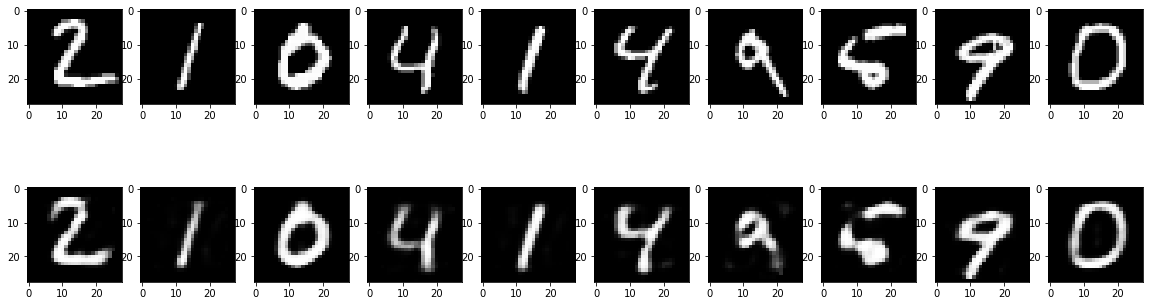

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

encoding_dim = 32  
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

In [9]:
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
noise_factor = 0.55

original_train = x_train
original_test = x_test
noise_train = np.random.normal(0, 1, original_train.shape)
noise_test = np.random.normal(0, 1, original_test.shape)
noisy_train = original_train + noise_factor * noise_train
noisy_test = original_test + noise_factor * noise_test

In [11]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(noisy_train, original_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noisy_test, original_test))

denoised_images = autoencoder.predict(noisy_test)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0738 - val_loss: 0.0473
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0412 - val_loss: 0.0360
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0335 - val_loss: 0.0308
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0295 - val_loss: 0.0278
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0271 - val_loss: 0.0260
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0254 - val_loss: 0.0245
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0241 - val_loss: 0.0234
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0232 - val_loss: 0.0225
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0225 - val_loss: 0.0220
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0221 - val_loss: 0.0216

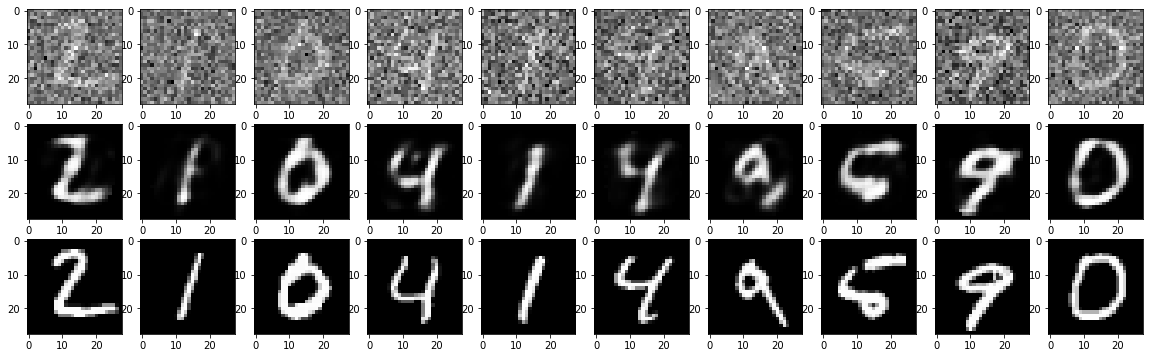

In [12]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(original_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
plt.show()

In [13]:
#GAN: 생성적 적대 신경망 → 생성자, 판별자

#GAN의 구조: 생성자, 판별자 → 자동 특징 추출

#판별자 훈련 → 생성자 훈련

In [14]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# 학습 데이터와 테스트 데이터 분리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 이미지를 [0, 1] 범위로 스케일링
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [15]:
BATCH_SIZE=128
EPOCHS=2000
Z_DIMENSIONS=32
data = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))

In [16]:
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
	activation='relu', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', 
	activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

In [18]:
discriminator = make_discriminator()

discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004),
                      metrics=['accuracy'])

In [23]:
def make_generator():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(7*7*64, input_shape=(Z_DIMENSIONS,)))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((7, 7, 64)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(32,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

In [24]:


    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2DTranspose(16,
                            kernel_size=5, padding='same',
                            activation=None,))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.9))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(1, kernel_size=5, padding='same',
                   activation='sigmoid'))
    return model

AttributeError: 'Functional' object has no attribute 'add'